In [7]:
import numpy as np

# tensorflow module
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense # 기능에 따른 이름 작성됨
from tensorflow.keras.optimizers import Adam

# 1. Raw Data Loading
# 지금은 샘플 데이터를 직접 만들어서 사용
# Simple Linear Regression을 구현
# 데이터
x_data = np.array([1,2,3,4,5],
                  dtype=np.float64).reshape(-1,1)

y_data = np.array([3,5,7,9,11],
                  dtype=np.float64).reshape(-1,1)

# 우리의 모델은 2x+1

# Model 생성
keras_model = Sequential()
# layer를 생성해서 model에 순서대로 추가
input_layer = Input(shape=(1,)) # 입력으로 들어오는 데이터 1건의 shape을 명시
keras_model.add(input_layer) # 모델에 기둥(layer)를 세워요

flatten_layer = Flatten()
keras_model.add(flatten_layer)

output_layer = Dense(units=1,
                     activation='linear')
keras_model.add(output_layer)

# 여기까지 하면 일단 모델 그림을 완성할 수 있어요!

# 모델 컴파일
keras_model.compile(loss='mse',
                    optimizer=Adam(learning_rate=1e-2))

# 모델 학습
keras_model.fit(
    x_data,     # 독립변수, X 값
    y_data,     # 종속변수, Label
    epochs= 1000,
    verbose=0   # 출력 생략
)


In [19]:
# 학습이 끝났으니 예측실행
# 입력이 10일때 -> 21이 결과로 나와야 할거 같아요!
keras_result = keras_model.predict(np.array([[10]]))
print(keras_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[18.058918]]


In [ ]:
# 믿고 사용하는 Sklearn을 이용
# sklearn은 최소제곱법이라는 방식으로
# 최적화 알고리즘이 아닌 해를 구하는 방식으로 수학적으로
# 계산해서 예측값을 도출!
from sklearn import linear_model        # 이 안에 LinearRegression이 들어가 있어요

# 데이터 준비
x_data = np.array([1,2,3,4,5],
                  dtype=np.float64).reshape(-1,1)

y_data = np.array([3,5,7,9,11],
                  dtype=np.float64).reshape(-1,1)

# 모델 구현
sklearn_model = linear_model.LinearRegression()

# 모델 학습
sklearn_model.fit(x_data,
                  y_data)

sklearn_result = sklearn_model.predict(np.array([[10]]))
sklearn_result
'''
array([[21.]])
'''

array([[21.]])

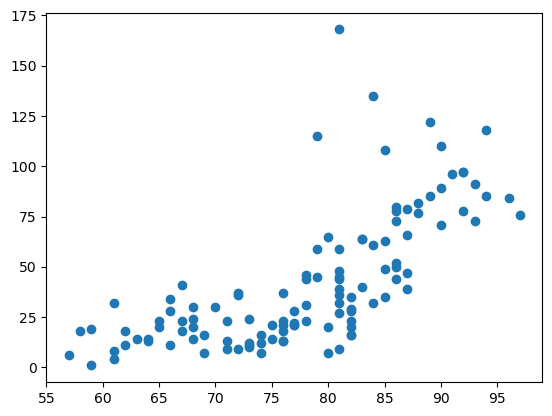

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# 1. Raw Data Loading
df = pd.read_csv('./data/ozone.csv')

# 확인
# display(df.head())
# print(df.shape) # (153, 6)
# 온도에 따른 오존량을 모델로 만들고
# 추후에 온도를 입력하면 그 때 오존량을 예측

training_data_set = df[['Temp', 'Ozone']]
training_data_set

# NaN이 있어 데이터 전처리 필요
# 결측치 처리 진행
# 결측치 삭제 또는 대치하거나 해야해요!
training_data_set = training_data_set.dropna(how='any')
# NaN이 보이면 해당 행은 무조건 삭제
training_data_set.shape # (116, 2)

# 데이터셋 준비
x_data = training_data_set['Temp'].values.reshape(-1,1)
y_data = training_data_set['Ozone'].values.reshape(-1,1)

# scatter를 그려서 데이터의 분포를 눈으로 확인!
plt.scatter(x_data.ravel(),
            y_data.ravel())
plt.show()

[[2.4287033]]
[-146.99549097]


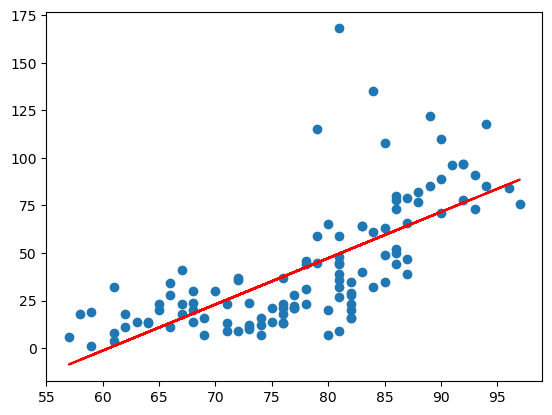

In [34]:
# 먼저 sklearn부터 구현

# 모델 생성
sklearn_model = linear_model.LinearRegression()

# 모델 학습
sklearn_model.fit(x_data,
                  y_data)

# 모델이 완성 되었어요.
# 단순선형회귀모델 w가 1개, bias가 1개 생성
print(sklearn_model.coef_)      # weight 값 [[2.4287033]]
print(sklearn_model.intercept_) # bias 값 [-146.99549097]

# 우리 모델은 y = 2.4287033x -146.99549097
plt.scatter(x_data.ravel(),
            y_data.ravel())

plt.plot(x_data.ravel(),
         (x_data.ravel() * (2.4287033)) - 146.99549097,
         color='r')

plt.show()